## Preprocessing Data



In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder

raw = pd.read_csv("D:\\Programming\\Python_code\\PrinciplesOfDS_Course\\Labs\\Data\\insurance.csv")
print(raw.info())
print(raw.isna().sum()/raw.shape[0])

#separate out categorical features from numeric
categorical = raw.drop(columns=["age", "bmi", "charges", "children"])
print(categorical.info())

numeric = raw.drop(columns=["sex", "smoker", "region"])
print(numeric.info())

# convert categorical features to numeric 
lenc = LabelEncoder()
categorical = categorical.apply(lenc.fit_transform) # convert all categoricals to numeric using .apply()
print(categorical.info())

print('Col 1:',categorical.iloc[:,0].unique(), 'Col 2:',categorical.iloc[:,1].unique(),'Col 3:',categorical.iloc[:,2].unique())
#Col 1: [0 1] Col 2: [1 0] Col 3: [3 2 1 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB
None
<class 'pandas.c

In [2]:
# Recombining DFs, going to test the model on both non-normalized binary cols as well as normalized binary cols. 

preProc = numeric.join(categorical) # .join() works for just smashing two DFs together by index. 

x_mean = np.mean(preProc, axis=0)
x_std = np.std(preProc)
preProc = (preProc-x_mean)/x_std

# creating non-normalized binary feature matrix
preProcBinary = preProc.copy()
preProcBinary['sex'] = categorical['sex']
preProcBinary['smoker'] = categorical['smoker']

print(preProc.head())
print(preProcBinary.head())

        age       bmi  children   charges       sex    smoker    region
0 -1.438764 -0.453320 -0.908614  0.298584 -1.010519  1.970587  1.343905
1 -1.509965  0.509621 -0.078767 -0.953689  0.989591 -0.507463  0.438495
2 -0.797954  0.383307  1.580926 -0.728675  0.989591 -0.507463  0.438495
3 -0.441948 -1.305531 -0.908614  0.719843  0.989591 -0.507463 -0.466915
4 -0.513149 -0.292556 -0.908614 -0.776802  0.989591 -0.507463 -0.466915
        age       bmi  children   charges  sex  smoker    region
0 -1.438764 -0.453320 -0.908614  0.298584    0       1  1.343905
1 -1.509965  0.509621 -0.078767 -0.953689    1       0  0.438495
2 -0.797954  0.383307  1.580926 -0.728675    1       0  0.438495
3 -0.441948 -1.305531 -0.908614  0.719843    1       0 -0.466915
4 -0.513149 -0.292556 -0.908614 -0.776802    1       0 -0.466915


## Splitting Data into Training and Testing sets


In [3]:
# predicting cost, so dropping from feature matrix 
from sklearn.model_selection import train_test_split

feat = preProc.drop(columns="charges")
featBin = preProcBinary.drop(columns="charges")

charges = preProc['charges']
chargesBin = preProcBinary['charges']

# normalizing chargesBin to see how it affects model outcomes to have smaller range
chargesBin = chargesBin / chargesBin.max()
print("after normalization: ",charges, "\n\n", chargesBin, charges.describe(), chargesBin.describe())

Xtrain, Xtest, yTrain, yTest = train_test_split(feat, charges, test_size=0.2, random_state=1)
XtrainBin, XtestBin, yTrainBin, yTestBin = train_test_split(featBin, chargesBin, test_size=0.2, random_state=1)

print(Xtrain.shape, "\n", Xtest.shape)

after normalization:  0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64 

 0       0.071574
1      -0.228611
2      -0.174672
3       0.172555
4      -0.186209
          ...   
1333   -0.052869
1334   -0.219098
1335   -0.230507
1336   -0.223019
1337    0.314276
Name: charges, Length: 1338, dtype: float64 count    1.338000e+03
mean    -8.098488e-17
std      1.000374e+00
min     -1.003557e+00
25%     -7.046504e-01
50%     -3.212089e-01
75%      2.783441e-01
max      4.171663e+00
Name: charges, dtype: float64 count    1.338000e+03
mean    -1.626336e-17
std      2.398022e-01
min     -2.405653e-01
25%     -1.689135e-01
50%     -7.699780e-02
75%      6.672257e-02
max      1.000000e+00
Name: charges, dtype: float64
(1070, 6) 
 (268, 6)


## Training Linear Regression Model 


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
lrBin = LinearRegression()
lr.fit(Xtrain, yTrain)
lrBin.fit(XtrainBin, yTrainBin)

print("Bias and Coefficient: ", str(lr.intercept_), str(lr.coef_)) 
print("Bias and Coefficient for Binary set: ", str(lrBin.intercept_), str(lrBin.coef_)) # bias is notably lower at -0.09411506075534107
# coefficients are different on the binary values as well 

yTrainPred = lr.predict(Xtrain)
yTrainPredBin = lrBin.predict(XtrainBin)

mae = mean_absolute_error(yTrainPred, yTrain)
maeBin = mean_absolute_error(yTrainPredBin, yTrainBin)
mse = mean_squared_error(yTrainPred, yTrain)
mseBin = mean_squared_error(yTrainPredBin, yTrainBin)
rmse = np.sqrt(mse)
rmseBin = np.sqrt(mseBin)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

print('prediction for Binary training set:')
print('MAEBin is: {}'.format(maeBin))
print('MSEBin is: {}'.format(mseBin))
print('RMSEBin is: {}'.format(rmseBin))
# predictions are totally equal despite different normalization here 


Bias and Coefficient:  -0.0007574169601981817 [ 0.29934808  0.15866501  0.04103637 -0.01009058  0.79228546 -0.0301655 ]
Bias and Coefficient for Binary set:  -0.09411506075534107 [ 0.07175749  0.03803399  0.00983693 -0.00483794  0.4706331  -0.00723105]
prediction for training set:
MAE is: 0.3444995401381891
MSE is: 0.2512432094047639
RMSE is: 0.5012416676661707
prediction for Binary training set:
MAEBin is: 0.08258086203594743
MSEBin is: 0.014436963667139062
RMSEBin is: 0.12015391657011877


## Evaluating the Lin Regression Model:


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

yTestPred = lr.predict(Xtest)
yTestPredBin = lrBin.predict(XtestBin)

mae = mean_absolute_error(yTestPred, yTest)
maeBin = mean_absolute_error(yTestPredBin, yTestBin)
mse = mean_squared_error(yTestPred, yTest)
mseBin = mean_squared_error(yTestPredBin, yTestBin)
rmse = np.sqrt(mse)
rmseBin = np.sqrt(mseBin)
r2 = r2_score(yTestPred, yTest)
r2Bin = r2_score(yTestPredBin, yTestBin)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print('r^2 is: {}'.format(r2))

print('prediction for Binary training set:')
print('MAEBin is: {}'.format(maeBin))
print('MSEBin is: {}'.format(mseBin))
print('RMSEBin is: {}'.format(rmseBin))
print('r^2 Bin is: {}'.format(r2Bin))

prediction for training set:
MAE is: 0.33506450289691736
MSE is: 0.2421181519985924
RMSE is: 0.49205502944141566
r^2 is: 0.6736534266647527
prediction for Binary training set:
MAEBin is: 0.08031916523248307
MSEBin is: 0.013912618660778234
RMSEBin is: 0.11795176412745269
r^2 Bin is: 0.673653426664752


## Binary + Normalized target variable VS. Fully Standardized data: 

As can be seen above, the r^2 values are practically identical, which suggests the models are quite similar in their ability to predict charges of a patient. Both used Z-Score standardization, however, one set was preprocessed a bit differently which changes the error scores due to the change in scale of the data, however, I don't think much insight can be derived from comparing MAE, MSE, RMSE for the two different preprocessing methods without converting values back to their original values. 


C:\Users\Tanner_N\AppData\Local\Temp\ipykernel_12212\1304223676.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  bars1 = axes.bar(x-width/2, yTest[0:10], width, label='Ground Truth')


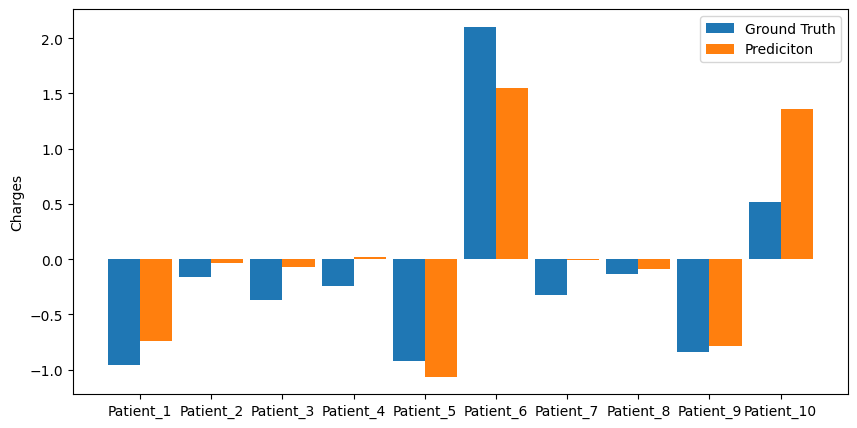

In [6]:
# visualization for fully standardized data: 
 
labels = ['Patient_1','Patient_2','Patient_3','Patient_4','Patient_5','Patient_6','Patient_7','Patient_8','Patient_9','Patient_10']
x = np.arange(len(labels))
width = .45

figure, axes = plt.subplots(figsize=(10,5))
bars1 = axes.bar(x-width/2, yTest[0:10], width, label='Ground Truth')
bars2 = axes.bar(x+width/2, yTestPred[0:10], width, label='Prediciton')

axes.set_ylabel('Charges')
axes.set_xticks(x)
axes.set_xticklabels(labels)
axes.legend()

plt.show()

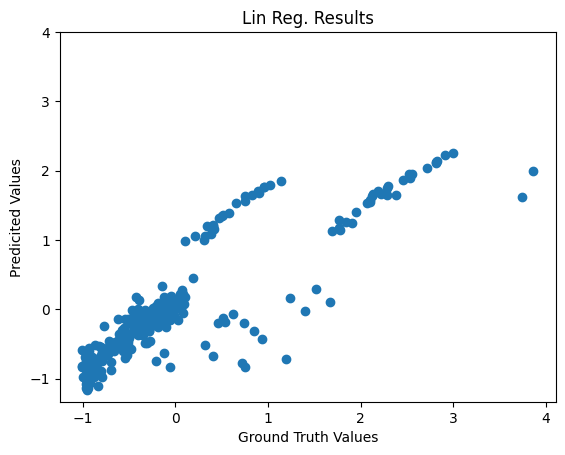

In [17]:
# making scatter plot for visualization: 

plt.scatter(yTest, yTestPred)
plt.xlabel("Ground Truth Values")
plt.ylabel("Predicited Values")
plt.title("Lin Reg. Results")
plt.ylim(top=4)
plt.show()

# a good model would produce a nearly perfect diagonal line, as the predicted values for all points would match the ground truth values. It can be seen below that the correlation is fairly poor, though not entirely random. 

## Min Max Scaled Data for Linear Regression:



In [8]:
# Diff preprocessing of data for more understandable model evaluation 
from sklearn.preprocessing import MinMaxScaler

mmScaler = MinMaxScaler()
X_3 = numeric.join(categorical)
medicalFeatures = X_3.drop(columns='charges').values
chrgVal = X_3['charges'].values

#splitting data
Xtrmm, Xtsmm, ytrmm, ytsmm, = train_test_split(medicalFeatures, chrgVal, test_size=.2, random_state=1)
print(Xtrmm.shape)
print(Xtsmm.shape)

Xtrmm = mmScaler.fit_transform(Xtrmm) 
Xtsmm = mmScaler.transform(Xtsmm) 
print(Xtrmm)
print(Xtsmm)

(1070, 6)
(268, 6)
[[0.76086957 0.28625235 0.         0.         0.         0.33333333]
 [0.76086957 0.14635459 0.2        1.         0.         1.        ]
 [0.         0.57384988 0.         1.         0.         0.66666667]
 ...
 [0.7173913  0.51116492 0.4        0.         1.         0.        ]
 [0.47826087 0.16841539 0.4        0.         1.         0.66666667]
 [0.84782609 0.32230293 0.2        1.         0.         0.66666667]]
[[0.02173913 0.52649987 0.         1.         0.         0.33333333]
 [0.84782609 0.41915523 0.         1.         0.         0.33333333]
 [0.7173913  0.56604789 0.         1.         0.         1.        ]
 ...
 [0.63043478 0.61824052 0.4        1.         1.         0.66666667]
 [0.02173913 0.55461394 0.         0.         0.         0.33333333]
 [0.36956522 0.27347323 0.         0.         0.         0.        ]]


In [9]:
# Training new model on minmax Data
lrmm = LinearRegression()
lrmm.fit(Xtrmm, ytrmm)
print("Bias:", str(lrmm.intercept_))
print("Weights/Coefficients:", str(lrmm.coef_))

yTrPred = lrmm.predict(Xtrmm)

mae = mean_absolute_error(yTrPred,ytrmm)
mse = mean_squared_error(yTrPred,ytrmm)
rmse = np.sqrt(mse)
r2 = r2_score(yTrPred, ytrmm)


print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print('r^2 is: {}'.format(r2))

Bias: -1537.1605531303703
Weights/Coefficients: [11868.71662735 11711.63530101  2061.19426876  -244.31610607
 23766.9743197   -991.88028204]
prediction for training set:
MAE is: 4170.334007230733
MSE is: 36817874.96889189
RMSE is: 6067.7734770582765
r^2 is: 0.662317527765385


### Scaled target Variable vs Unscaled: 

Above I tested both a scaled version of ytrmm and the unscaled version which remains, both produce the same r2 and thus I decided to leave the unscaled version for easier to understand error metrics. 

## Evaluating MinMax Model:


prediction for testing set:
MAE is: 4056.118305662653
MSE is: 35480663.81217908
RMSE is: 5956.564766052585
r^2 is: 0.7623224022563388


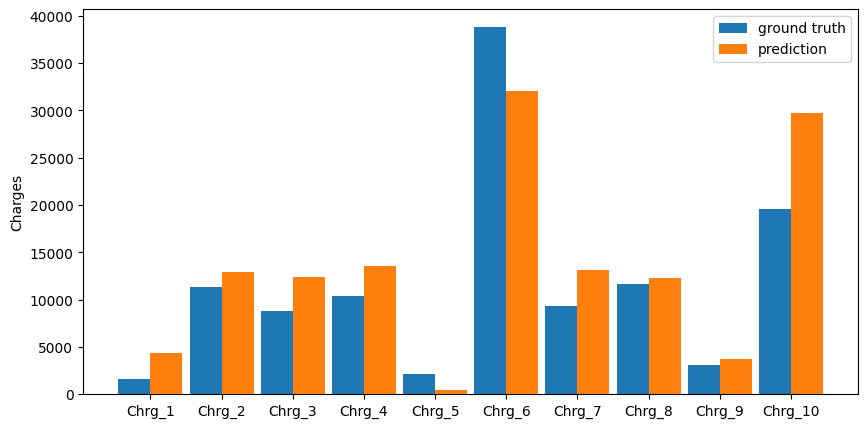

In [10]:
ytsPred = lrmm.predict(Xtsmm)

mae = mean_absolute_error(ytsPred,ytsmm)
mse = mean_squared_error(ytsPred,ytsmm)
rmse = np.sqrt(mse)
r2 = r2_score(ytsmm, ytsPred)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print('r^2 is: {}'.format(r2))

labels = ['Chrg_1','Chrg_2','Chrg_3','Chrg_4','Chrg_5','Chrg_6','Chrg_7','Chrg_8','Chrg_9','Chrg_10',]
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5)) 
rects1 = ax.bar(x - width/2, ytsmm[0:10], width, label='ground truth')
rects2 = ax.bar(x + width/2, ytsPred[0:10], width, label='prediction')

ax.set_ylabel('Charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show() 

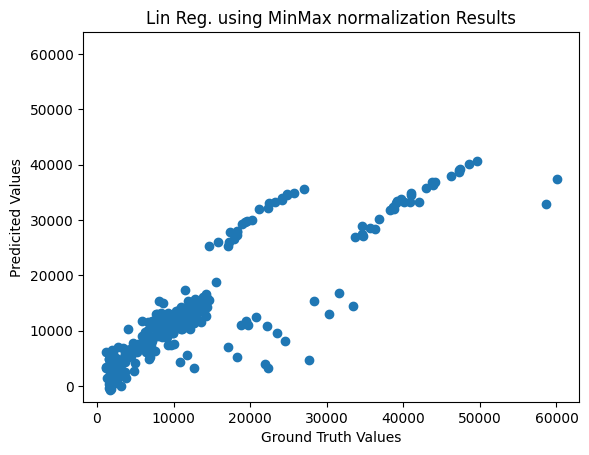

In [11]:
# making scatter plot to compare predicted values to ground truth values 

fig, ax = plt.subplots()
scatter = ax.scatter(ytsmm, ytsPred)
ax.set_ylim(top=64000) 
plt.xlabel("Ground Truth Values")
plt.ylabel("Predicited Values")
plt.title("Lin Reg. using MinMax normalization Results")
plt.show()

## Ridge Regression w/ Standardized Data: 


In [12]:
from sklearn.linear_model import Ridge

regCoefficient = [.01, .05, .1, .25, .5, .75, 1, 2.5, 5, 7.5, 10] # 11 values to test

# loop gets the best reg value, then we use that reg value to make predictions on the testing data. 
best_r2 = 0
best_tst_r2 = 0
best_reg = 0 

for reg in regCoefficient: 
    rr = Ridge(alpha=reg)
    rr.fit(Xtrain, yTrain)

    y_temp_pred = rr.predict(Xtrain)
    y_tst_pred = rr.predict(Xtest)

    mae = mean_absolute_error(y_temp_pred, yTrain)
    mse = mean_squared_error(y_temp_pred, yTrain)
    rmse = np.sqrt(mse)
    r2 = r2_score(yTrain, y_temp_pred)

    maeTst = mean_absolute_error(y_tst_pred, yTest)
    mseTst = mean_squared_error(y_tst_pred, yTest)
    rmseTst = np.sqrt(mseTst)
    r2Tst = r2_score(yTest, y_tst_pred)

    print('\n\nPrediction for training set: from reg:', reg, "\n")
    print('MAE is: {}, and for the test prediction its: {}'.format(mae, maeTst))
    print('MSE is: {}, and for the test prediction its: {}'.format(mse, mseTst))
    print('RMSE is: {}, and for the test prediction its: {}'.format(rmse, rmseTst))
    print('r^2 is: {}, and for the test prediction its: {}'.format(r2, r2Tst))
    #print('Accuracy Score is: {}'.format(acc))

    if best_r2 < r2:
        best_r2 = r2
        best_tst_r2 = r2Tst
        best_reg = reg

print("\n\nBest r2, r2Tst and reg of all:\n", best_r2, best_tst_r2, best_reg)




Prediction for training set: from reg: 0.01 

MAE is: 0.34450051399945364, and for the test prediction its: 0.33506553392854393
MSE is: 0.2512432094704644, and for the test prediction its: 0.242118439357581
RMSE is: 0.5012416677317084, and for the test prediction its: 0.49205532144016184
r^2 is: 0.7475615631272967, and for the test prediction its: 0.7623221201676417


Prediction for training set: from reg: 0.05 

MAE is: 0.3445044092529013, and for the test prediction its: 0.33506965785086057
MSE is: 0.25124321104715064, and for the test prediction its: 0.24211959006783468
RMSE is: 0.5012416693044889, and for the test prediction its: 0.49205649072828483
r^2 is: 0.7475615615431097, and for the test prediction its: 0.7623209905619243


Prediction for training set: from reg: 0.1 

MAE is: 0.3445092778886318, and for the test prediction its: 0.3350748122943784
MSE is: 0.2512432159736867, and for the test prediction its: 0.242121031322267
RMSE is: 0.501241674218821, and for the test predi

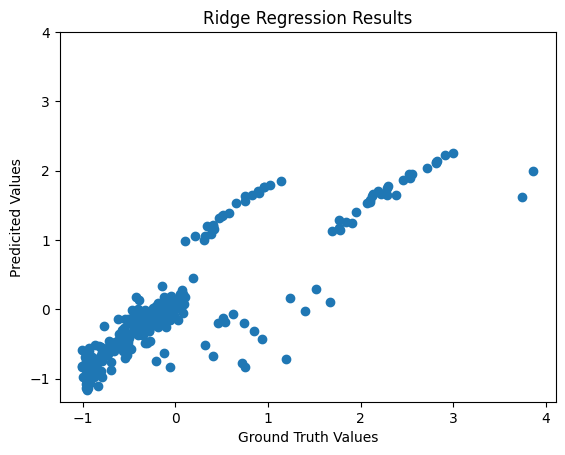

In [18]:
# Scatter plot of best alpha (lambda) value for regularization term in ridge regression:

rr = Ridge(alpha=.01)
rr.fit(Xtrain, yTrain)

y_tst_pred = rr.predict(Xtest)

fig, ax = plt.subplots()
scatter = ax.scatter(yTest, y_tst_pred)
#plt.plot(Xtest, y_tst_pred, color='red', linewidth=1) # I wanted to make a line which captured the predicted model from our ridge regression to cast over the scatter plot, but havn't figured out how to make it work yet. 
ax.set_ylim(top=4) 
plt.xlabel("Ground Truth Values")
plt.ylabel("Predicited Values")
plt.title("Ridge Regression Results")
plt.show()

## Ridge Regression Outcomes: 

on the training data AND the test data there is no significant difference for changeing the reg value at all with respect to the r2 produced. All r2's were practically identical at 74% . 

- Best r2 and reg of all:
 - 0.7475615631272967 0.01

Similarly the MAE MSE and RMSE were all practically identical as well.

If we considered the r2 scores to be best for comparing models, it would be clear that the ridge regression is best with a r2 of ~0.75, which is substantially better than the linear regression models (across various preprocessing techniques), as they were around 0.66-0.67 . Thus if I were to continue optimizing the model I would likely put more time into experimenting with regression models using regularization terms to see if I could further improve performance. 